In [2]:
import numpy as np
import PIL 

In [3]:
an_image = PIL.Image.open("/content/sample_data/Spectacular-Photos-of-Niagara-Falls-Casinos.jpg")

Converting the image into an numpy array with rgb values

In [4]:
image_array = np.asarray(an_image)

In [5]:
print(image_array)

[[[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 ...

 [[119 125  79]
  [122 127  86]
  [134 140 102]
  ...
  [150 158 135]
  [133 141 118]
  [129 137 114]]

 [[129 127  86]
  [121 122  82]
  [100 102  65]
  ...
  [155 165 140]
  [132 142 117]
  [144 154 129]]

 [[174 191 147]
  [159 170 128]
  [145 147 108]
  ...
  [158 167 146]
  [145 154 135]
  [144 153 134]]]


In [6]:
shape = image_array.shape

(height, width, rgb)

In [7]:
print(shape)

(737, 1000, 3)


In [8]:
height = len(image_array)
width = len(image_array[0])

In [9]:
print(height)
print(width)

737
1000


In [10]:
print(image_array[0][0][2]) #blue value pixels
print(image_array[0][1][2])
print(image_array[0][2][2])

226
226
226


Moves part of the image based on the top left tuple (x,y) and bottom right tuple (x,y) to a new location designated by the new_top_left (x,y) tuple. The overlay chooses what the original spot that was moved will look like. For overlay = 0, the original spot will be left black. For overlay = 1, the original spot will stay there, and the new image will be layered underneath. For overlay = 2, it is the same as overlay = 1, except the original will be layered underneath and the new image will be on top. If the new part doesn't overlap with the previous spot, then overlay = 1 and overlay = 2 are the same. 

In [36]:
def move_part(old_image,old_top_left,old_bottom_right,new_top_left,overlay):
  shape = old_image.shape
  height = len(old_image)
  width = len(old_image[0])
  new_image = np.copy(old_image)

  #Getting all the values for the coordinates to move
  top = old_top_left[1]
  left = old_top_left[0]
  bottom = old_bottom_right[1]
  right = old_bottom_right[0]

  #checking if our coordinates are out of bounds
  if top < 0:
    print("top pixel is out of bounds")
    return 0
  if bottom > height:
    print("bottom pixel is out of bounds")
    return 0
  if left < 0:
    print("left pixel is out of bounds")
    return 0
  if right > width:
    print("right pixel is out of bounds")
    return 0

  #checking if our coordinates make sense
  if top >= bottom:
    print("top pixel must be less than bottom pixel")
    return 0
  if left >= right:
    print("left pixel must be less than right pixel")
    return 0

  #the height and width of the image part to move
  part_height = bottom - top 
  part_width = right - left

  #If our new location is partially out of bounds, we will need to make sure we only access the correct spots
  top_check = 0
  left_check = 0
  bottom_check = 0
  right_check = 0

  if new_top_left[0] < 0:
    left_check = -new_top_left[0]
  elif new_top_left[0] + part_width > width:
    right_check = -(new_top_left[0] + part_width - width)

  if new_top_left[1] < 0:
    top_check = -new_top_left[1]
  elif new_top_left[1] + part_height > height:
    bottom_check = -(new_top_left[1] + part_height - height)

  #moves image, leaves previous spot black
  if overlay == 0:

    #Making previous spot black
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          new_image[y][x][rgb] = 0

    #Making new spot look like old part
    for y in range(top_check, part_height + bottom_check):
      for x in range(left_check, part_width + right_check):
        for rgb in range(3):
          new_image[y + new_top_left[1]][x + new_top_left[0]][rgb] = old_image[top + top_check + y][left + left_check + x][rgb]

    return new_image

  #moves image, leaves previous spot same as before, but with original on top
  elif overlay == 1:

    #Making new spot look like old part
    for y in range(top_check, part_height + bottom_check):
      for x in range(left_check, part_width + right_check):
        for rgb in range(3):
          new_image[y + new_top_left[1]][x + new_top_left[0]][rgb] = old_image[top + top_check + y][left + left_check + x][rgb]

    #Putting the original part back, in case it has been overlapped
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          new_image[y][x][rgb] = old_image[y + top][x + left][rgb]

    return new_image

  #moves image, leaves previous spot same as before, but with new on top
  elif overlay == 2:

    #Places old image onto new spot regardless of what was there before
    for y in range(top_check, part_height + bottom_check):
      for x in range(left_check, part_width + right_check):
        for rgb in range(3):
          new_image[y + new_top_left[1]][x + new_top_left[0]][rgb] = old_image[top + top_check + y][left + left_check + x][rgb]

    return new_image

**Underneath is all testing, no need to look really**

In [17]:
new_image = move_part(image_array,(0,0),(300,300),(300,300),0)

In [ ]:
new_image

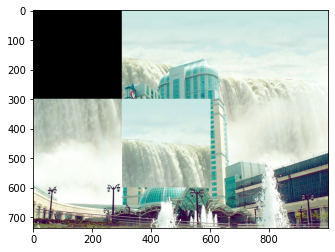

In [19]:
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.show()

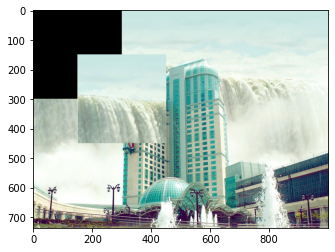

In [20]:
new_image = move_part(image_array,(0,0),(300,300),(150,150),0)
plt.imshow(new_image)
plt.show()

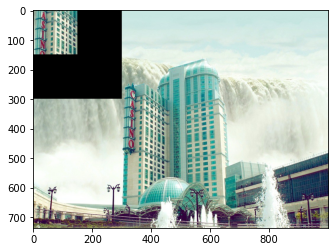

In [21]:
new_image = move_part(image_array,(0,0),(300,300),(-150,-150),0)
plt.imshow(new_image)
plt.show()

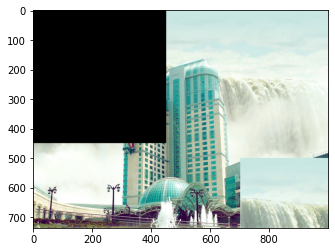

In [29]:
new_image = move_part(image_array,(0,0),(450,450),(700,500),0)
plt.imshow(new_image)
plt.show()

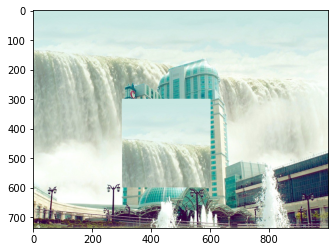

In [32]:
new_image = move_part(image_array,(0,0),(300,300),(300,300),1)
plt.imshow(new_image)
plt.show()

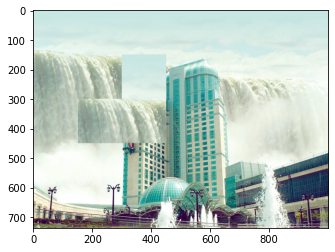

In [31]:
new_image = move_part(image_array,(0,0),(300,300),(150,150),1)
plt.imshow(new_image)
plt.show()

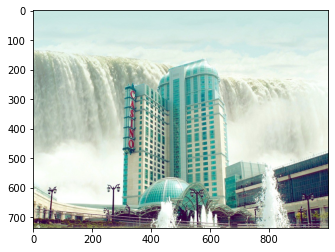

In [33]:
new_image = move_part(image_array,(0,0),(300,300),(-150,-150),1)
plt.imshow(new_image)
plt.show()

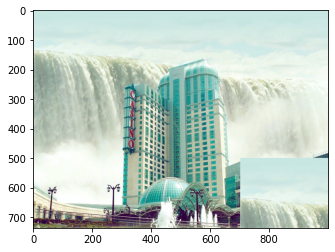

In [35]:
new_image = move_part(image_array,(0,0),(450,450),(700,500),1)
plt.imshow(new_image)
plt.show()

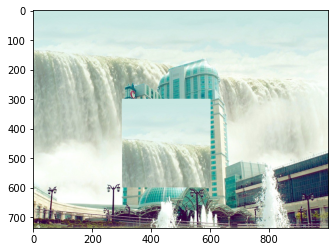

In [37]:
new_image = move_part(image_array,(0,0),(300,300),(300,300),2)
plt.imshow(new_image)
plt.show()

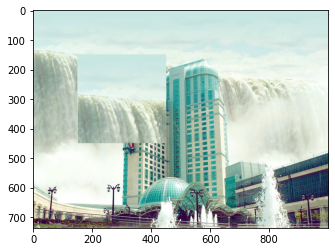

In [38]:
new_image = move_part(image_array,(0,0),(300,300),(150,150),2)
plt.imshow(new_image)
plt.show()

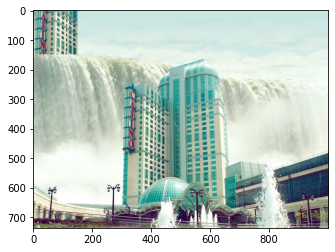

In [39]:
new_image = move_part(image_array,(0,0),(300,300),(-150,-150),2)
plt.imshow(new_image)
plt.show()

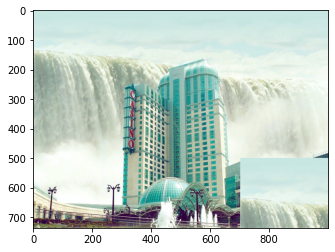

In [41]:
new_image = move_part(image_array,(0,0),(450,450),(700,500),2)
plt.imshow(new_image)
plt.show()